# Using Support Vector Regression to Predict NextEra Energy Stock Prices 

In [144]:
# Importing needed packages
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from pandas_datareader import data
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns

In [134]:
# Downloading NextEra Energy(NEE) data from Yahoo Finance
ticker = ["NEE"]
start_date = "2019-11-01"
end_date = "2020-01-13"
dt = data.DataReader(ticker, data_source = 'yahoo', start = start_date, end = end_date)


In [135]:
# Preparing the data

# Take only the closing price of the NextEra Energy stock data
dt = dt[['Close']]
# Turn Index column into a column to be later used as the independent variable
dt['Dates'] = dt.index
# Create a new column of the number of days in a new format to that vector regression can be performed
dt['date_delta'] = (dt['Dates'] - dt['Dates'].min())/np.timedelta64(1,'D')
# Split the data in the dependent variable y - stock prices and independent variable x - date_delta
X = dt.iloc[:, 2].values.reshape(-1,1)
y = dt.iloc[:, 0].values.reshape(-1,1)


# Split data into training and testing data. The testing data will be thelast five days of the
#time series 2020-01-08 to 2020-01-13 i.e. - days 67,68,69,70,73
X_train = X[:-5,:]
X_test = X[-5:,:]
y_train = y[:-5,:]
y_test = y[-5:,:]

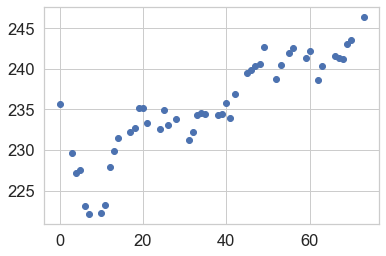

In [136]:
# Plotting X and y data
%matplotlib inline
plt.scatter(X, y)
plt.show()

In [143]:
# parameter tuning with gridsearch cv
y_partune = np.ravel(y_train)
Cs = [10,100,1000]
gammas = [0.001, 0.01, 0.1, 1]
kernels = [ 'rbf', 'linear']
param_grid = {'kernel': kernels, 'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_partune)
grid_search.best_params_

C:\Users\Sarah\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

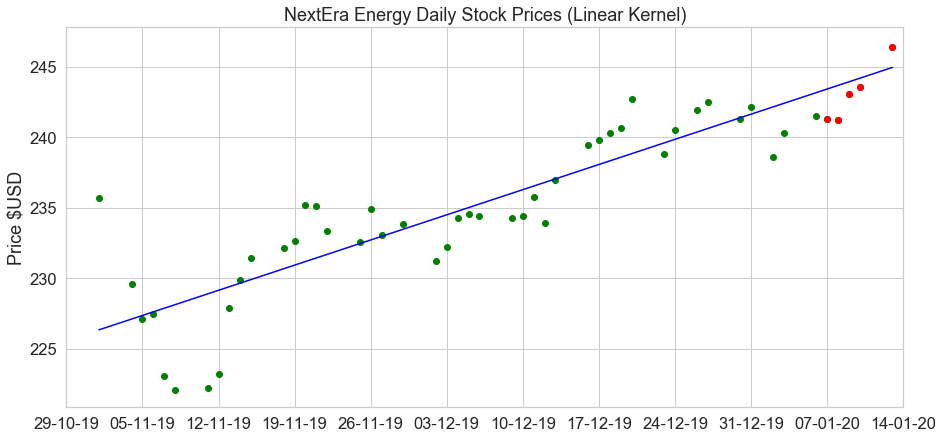

In [141]:
# Predicting y_test values with X_test with linear kernel

svr_linear = SVR(kernel='linear', C=100, gamma=0.001) 
svr_linear.fit(X_train, y_partune)
y_pred = svr_linear.predict(X)

%matplotlib inline
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(dt['Dates'], y, color = 'green')
ax.scatter(date_g, price_g, color = 'red')
ax.plot(dt['Dates'], y_pred, color = 'blue')
ax.set_title('NextEra Energy Daily Stock Prices (Linear Kernel)')
ax.set_ylabel('Price $USD')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))
ax.set_xlim((np.datetime64(start_date) - np.timedelta64(3,'D')),(np.datetime64(end_date)+ np.timedelta64(1,'D')) )
plt.show()


The red points the y_test points that were not included in the fitting of the SVR model. The blue line are the predicted stock prices using the SVR fitted model with a linear model. 

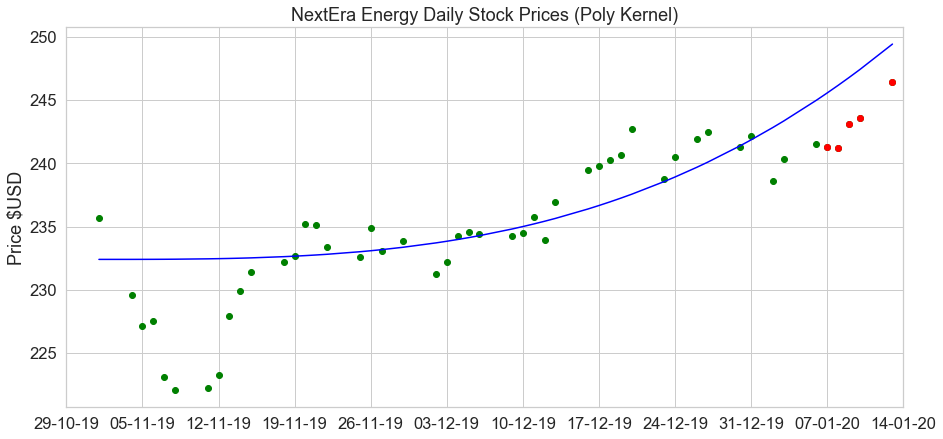

In [138]:
# Compare results with a SVR model when kernel = 'poly'
svr_poly = SVR(kernel='poly', degree = 3, C=.1, gamma=.001)
svr_poly.fit(X_train, y_partune)
svr_poly.score(X_train, y_partune)
y_pred2  = svr_poly.predict(X)

%matplotlib inline
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(dt['Dates'], y, color = 'green')
ax.scatter(date_g, price_g, color = 'red')
ax.plot(dt['Dates'], y_pred2, color = 'blue')
ax.set_title('NextEra Energy Daily Stock Prices (Poly Kernel)')
ax.set_ylabel('Price $USD')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))
ax.set_xlim((np.datetime64(start_date) - np.timedelta64(3,'D')),(np.datetime64(end_date)+ np.timedelta64(1,'D')) )
plt.show()

The red points are again the y_test points that were not included in the fitting of the SVR model. The blue line are the predicted stock prices using the SVR fitted model with a polynomial kernel of degree 3. 

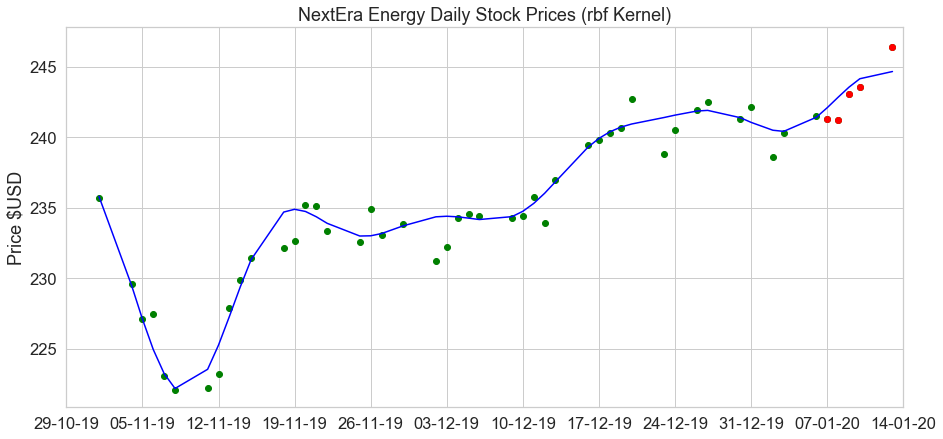

In [139]:
#Compare results when kernel = 'rbf'
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.01)
svr_rbf.fit(X_train, y_partune)
y_pred3  = svr_rbf.predict(X)

%matplotlib inline
sns.set(font_scale=1.5, style="whitegrid")
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(dt['Dates'], y, color = 'green')
ax.scatter(date_g, price_g, color = 'red')
ax.plot(dt['Dates'], y_pred3, color = 'blue')
ax.set_title('NextEra Energy Daily Stock Prices (rbf Kernel)')
ax.set_ylabel('Price $USD')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d-%m-%y"))
ax.set_xlim((np.datetime64(start_date) - np.timedelta64(3,'D')),(np.datetime64(end_date)+ np.timedelta64(1,'D')) )
plt.show()

The red points are again the y_test points that were not included in the fitting of the SVR model. The blue line are the predicted stock prices using the SVR fitted model with a rbf kernel. 

In [ ]:
svr_linear.

In [146]:
#Compare r-squared scores accross the three kernels
print(svr_linear.score(X_test, y_test))
print(svr_poly.score(X_test, y_test))
print(svr_rbf.score(X_test, y_test))


0.2273462498907043
-3.492403256153602
0.6147244699583777


In [147]:
# mean squared error for linear model based on training data
y_pred = svr_linear.predict(X_train)
print(mean_squared_error(y_train, y_pred))

# mean squared error for rbf model
y_pred3  = svr_rbf.predict(X_train)
print(mean_squared_error(y_train, y_pred3))


8.34996070925802
1.4805133871777505


In [149]:
# mean squared error for linear model based on test data
y_pred = svr_linear.predict(X_test)
print(mean_squared_error(y_test, y_pred))

# mean squared error for rbf model
y_pred3  = svr_rbf.predict(X_test)
print(mean_squared_error(y_test, y_pred3))

2.767055907210214
1.3797628383404792


As it can be seen from the graphs as well as the r-squared test the rbf kernel predicts the NextEra Energy's energy from January 8, 2020 to January 13 2020 most accurately out of the three SVR models. However, an r-squared score of .6147 leaves room for improvement and it might be benificial to explore additional machine learning models.